# Inicialização dataset - Task [001]

In [179]:
import requests
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [181]:
# print all the information about the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

,Unit
count,1281.000000
mean,10.177674
std,2.318850
min,0.000000
25%,9.400000
50%,10.100000
75%,10.500000
max,39.000000


In [182]:
# print all the information about the dataframe
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WineID      100646 non-null  int64  
 1   WineName    100646 non-null  object 
 2   Type        100646 non-null  object 
 3   Elaborate   100646 non-null  object 
 4   Grapes      100646 non-null  object 
 5   Harmonize   100646 non-null  object 
 6   ABV         100646 non-null  float64
 7   Body        100646 non-null  object 
 8   Acidity     100646 non-null  object 
 9   Code        100646 non-null  object 
 10  Country     100646 non-null  object 
 11  RegionID    100646 non-null  int64  
 12  RegionName  100646 non-null  object 
 13  WineryID    100646 non-null  int64  
 14  WineryName  100646 non-null  object 
 15  Website     82779 non-null   object 
 16  Vintages    100646 non-null  object 
dtypes: float64(1), int64(3), object(13)
memory usage: 13.1+ MB


,WineID,ABV,RegionID,WineryID
count,100646.000000,100646.000000,100646.000000,100646.000000
mean,150387.308755,13.268421,1738.085955,41316.599756
std,29095.984572,1.472526,495.235850,18359.726909
min,100001.000000,0.000000,1000.000000,10000.000000
25%,125183.250000,12.500000,1327.000000,24375.250000
50%,150374.500000,13.400000,1710.000000,41826.500000
75%,175591.750000,14.000000,2058.000000,57550.000000
max,200795.000000,50.000000,3750.000000,71840.000000


In [183]:
# print all the information about the dataframe
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   WineName                   222 non-null    object 
 1   WineryName                 222 non-null    object 
 2   Description                221 non-null    object 
 3   Price                      222 non-null    object 
 4   Capacity                   222 non-null    object 
 5   Grape                      222 non-null    object 
 6   Secondary Grape Varieties  73 non-null     object 
 7   Closure                    222 non-null    object 
 8   Country                    222 non-null    object 
 9   Unit                       222 non-null    float64
 10  Characteristics            218 non-null    object 
 11  Per bottle / case / each   222 non-null    object 
 12  Type                       222 non-null    object 
 13  ABV                        222 non-null    object 

,Unit,Vintage
count,222.000000,222.000000
mean,10.445045,2019.094595
std,1.663978,2.542858
min,4.300000,2007.000000
25%,10.100000,2018.000000
50%,10.500000,2020.000000
75%,10.900000,2021.000000
max,21.800000,2022.000000


In [184]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object': 
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

In [185]:
# view all the unique values for each column except for the columns:'Title' 'Description', 'Country', 'Unit' 'Region' 'Appellation'
for col in df.columns:
    if col not in ['Title', 'Description', 'Country', 'Unit', 'Region', 'Appellation']:
        print(col, df[col].unique())

Price ['£9.99 per bottle' '£15.99 per bottle' '£12.49 per bottle'
 '£17.99 per bottle' '£300.00 per bottle' '£12.99 per bottle'
 '£80.00 per bottle' '£13.99 per bottle' '£8.99 per bottle'
 '£11.99 per bottle' '£46.99 per bottle' '£11.29 per bottle'
 '£22.99 per bottle' '£45.99 per bottle' '£49.99 per bottle'
 '£33.99 per bottle' '£23.99 per bottle' '£21.99 per bottle'
 '£42.99 per bottle' '£29.99 per bottle' '£39.99 per bottle'
 '£14.99 per bottle' '£16.99 per bottle' '£7.99 per bottle'
 '£18.99 per bottle' '£19.99 per bottle' '£10.99 per bottle'
 '£34.99 per bottle' '£43.99 per bottle' '£24.99 per bottle'
 '£35.99 per bottle' '£37.99 per bottle' '£99.99 per bottle'
 '£75.99 per bottle' '£79.00 per case' '£61.99 per bottle'
 '£57.99 per bottle' '£20.99 per bottle' '£44.99 per bottle'
 '£36.99 per bottle' '£69.99 per bottle' '£25.99 per bottle'
 '£6.99 per bottle' '£48.99 per bottle' '£13.00 per bottle'
 '£93.99 per bottle' '£26.99 per bottle' '£49.00 per case'
 '£59.94 per case' '£200.

In [186]:
for col in df3.columns:
    if col not in ['WineName', 'WineryName', 'Grape', 'Secondary Grape Varieties', 'Country', 'Region', 'Appellation', 'Style', 'Characteristics', 'Description']:
        print(col, df3[col].unique())

Price ['£15.99 per bottle' '£17.99 per bottle' '£14.99 per bottle'
 '£12.99 per bottle' '£18.99 per bottle' '£16.99 per bottle'
 '£22.99 per bottle' '£29.99 per bottle' '£21.99 per bottle'
 '£34.99 per bottle' '£13.99 per bottle' '£11.29 per bottle'
 '£11.99 per bottle' '£9.99 per bottle' '£31.99 per bottle'
 '£26.99 per bottle' '£42.99 per bottle' '£37.99 per bottle'
 '£19.99 per bottle' '£32.99 per bottle' '£24.99 per bottle'
 '£79.99 per bottle' '£39.99 per bottle' '£54.99 per bottle'
 '£69.99 per bottle' '£33.99 per bottle' '£99.00 per bottle'
 '£84.99 per bottle' '£23.99 per bottle' '£188.99 per bottle'
 '£49.99 per bottle' '£64.99 per bottle' '£44.99 per bottle'
 '£85.00 per bottle' '£59.99 per bottle' '£12.49 per bottle'
 '£52.99 per bottle' '£30.99 per bottle' '£45.99 per bottle'
 '£89.99 per bottle' '£27.99 per bottle' '£7.99 per bottle'
 '£10.99 per bottle' '£169.99 per bottle' '£72.99 per bottle'
 '£20.99 per bottle' '£60.99 per bottle' '£75.99 per bottle'
 '£25.99 per bottl

# Limpeza de dados
- Remoção de valores nulos
- Normalização de valores
- Remoção de colunas desnecessárias

In [187]:
# Drop the columns in df2 called 'Websites', 'WineryID', 'WineryName', 'RegionID', 'Code'
# Drop rows with NaN to prevent errors in max_elements

# In the df2 dataframe, the column vintage is an array of integers. We will split the values into separate columns
# and then drop the original column

#    # Drop rows where any element in the array is N.V.
#    df2 = df2[~df2['Vintages'].str.contains('N.V.')]
#    
#    df2['Vintages'] = df2['Vintages'].apply(eval)  # Converte strings representando listas em listas reais
#    
#    # Confirme o número máximo de elementos em qualquer lista na coluna
#    max_elements = df2['Vintages'].apply(len).max()
#    
#    print(max_elements)
#    
#    # Dynamically split the arrays into separate columns
#    vintage_split = pd.DataFrame(df2['Vintages'].tolist(), columns=[f'Vintage_{i+1}' for i in range(max_elements)])

# Combine with the original dataframe and drop the original Vintage column
#df2 = pd.concat([df2, vintage_split], axis=1).drop(columns=['Vintages'])

display(df2)

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10003,Monte Paschoal,http://www.montepaschoal.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100641,200791,Rulandské Šedé Výběr z Hroznů,White,Varietal/100%,['Pinot Gris'],"['Rich Fish', 'Shellfish', 'Maturated Cheese',...",13.0,Medium-bodied,Medium,CZ,Czech Republic,2295,Morava,67056,Rodinné Vinařství Pavel Binder,http://www.pavelbinder.cz,"[2019, 2018, 2017, 2016, 2015, 2014, 2013, 201..."
100642,200792,Top Collection Merlot Pozdní Sběr,Dessert,Varietal/100%,['Merlot'],"['Beef', 'Game Meat']",13.5,Medium-bodied,High,CZ,Czech Republic,2295,Morava,66978,Vinarstvi Mutěnice,http://www.vinarstvimutenice.cz,"[2020, 2019, 2018, 2017, 2016, 2015, 2013, 2010]"
100643,200793,Falter Ego Gelber Muskateller,White,Varietal/100%,['Gelber Muskateller'],"['Spicy Food', 'Sweet Dessert']",12.5,Medium-bodied,High,AT,Austria,2086,Südsteiermark,62547,Hannes Sabathi,http://www.sabathi-weine.at,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100644,200794,Reisberg Riesling,White,Varietal/100%,['Riesling'],"['Pork', 'Shellfish', 'Spicy Food', 'Poultry',...",12.5,Medium-bodied,High,AT,Austria,2093,Wien,62795,Zahel,http://www.zahel.at,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."


In [188]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)	
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)


        Type_Dessert  Type_Dessert/Port  Type_Red  Type_Rosé  Type_Sparkling  \
0              False              False     False      False            True   
1              False              False      True      False           False   
2              False              False      True      False           False   
3              False              False     False      False           False   
4              False              False      True      False           False   
...              ...                ...       ...        ...             ...   
100641         False              False     False      False           False   
100642          True              False     False      False           False   
100643         False              False     False      False           False   
100644         False              False     False      False           False   
100645         False              False      True      False           False   

        Type_White  Body_Full-bodied  B

In [189]:
#   # Compute the correlation matrix
#   correlation_matrix = encoded_df.corr()
#   
#   # Display the correlation matrix as a heatmap with larger dimensions and better font scaling
#   plt.figure(figsize=(20, 15))  # Increased figure size
#   sns.heatmap(
#       correlation_matrix, 
#       annot=True, 
#       fmt=".2f", 
#       cmap="coolwarm", 
#       cbar=True, 
#       annot_kws={"size": 10}  # Adjust annotation font size
#   )
#   plt.xticks(fontsize=12, rotation=45)  # Adjust x-axis labels
#   plt.yticks(fontsize=12)  # Adjust y-axis labels
#   plt.title("Correlation Matrix", fontsize=18)  # Add a larger title
#   plt.show()

# Classification Dataset Preprocessing - Task [066]
### Normalizing Harmonize and grouping it into broader categories

In [190]:
# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)


### Normalizing the rest of the columns

In [191]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity'])

# Binary Encoding for the column 'Grapes'
encoder = BinaryEncoder(cols=['Grapes'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = one_hot_encoded_df.copy()

# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])

# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Grapes','Harmonize'])
encoded_df = encoded_df.dropna()
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

### Boxplot

<Axes: xlabel='ABV'>

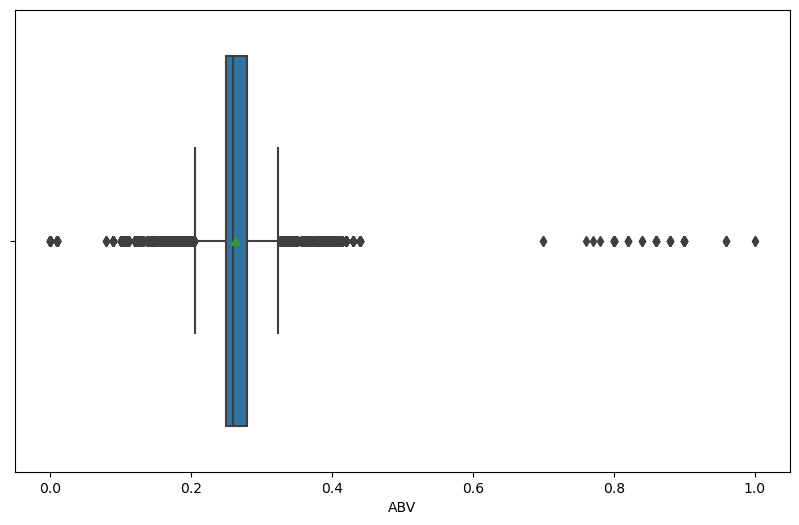

In [192]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

### Correlation Matrix

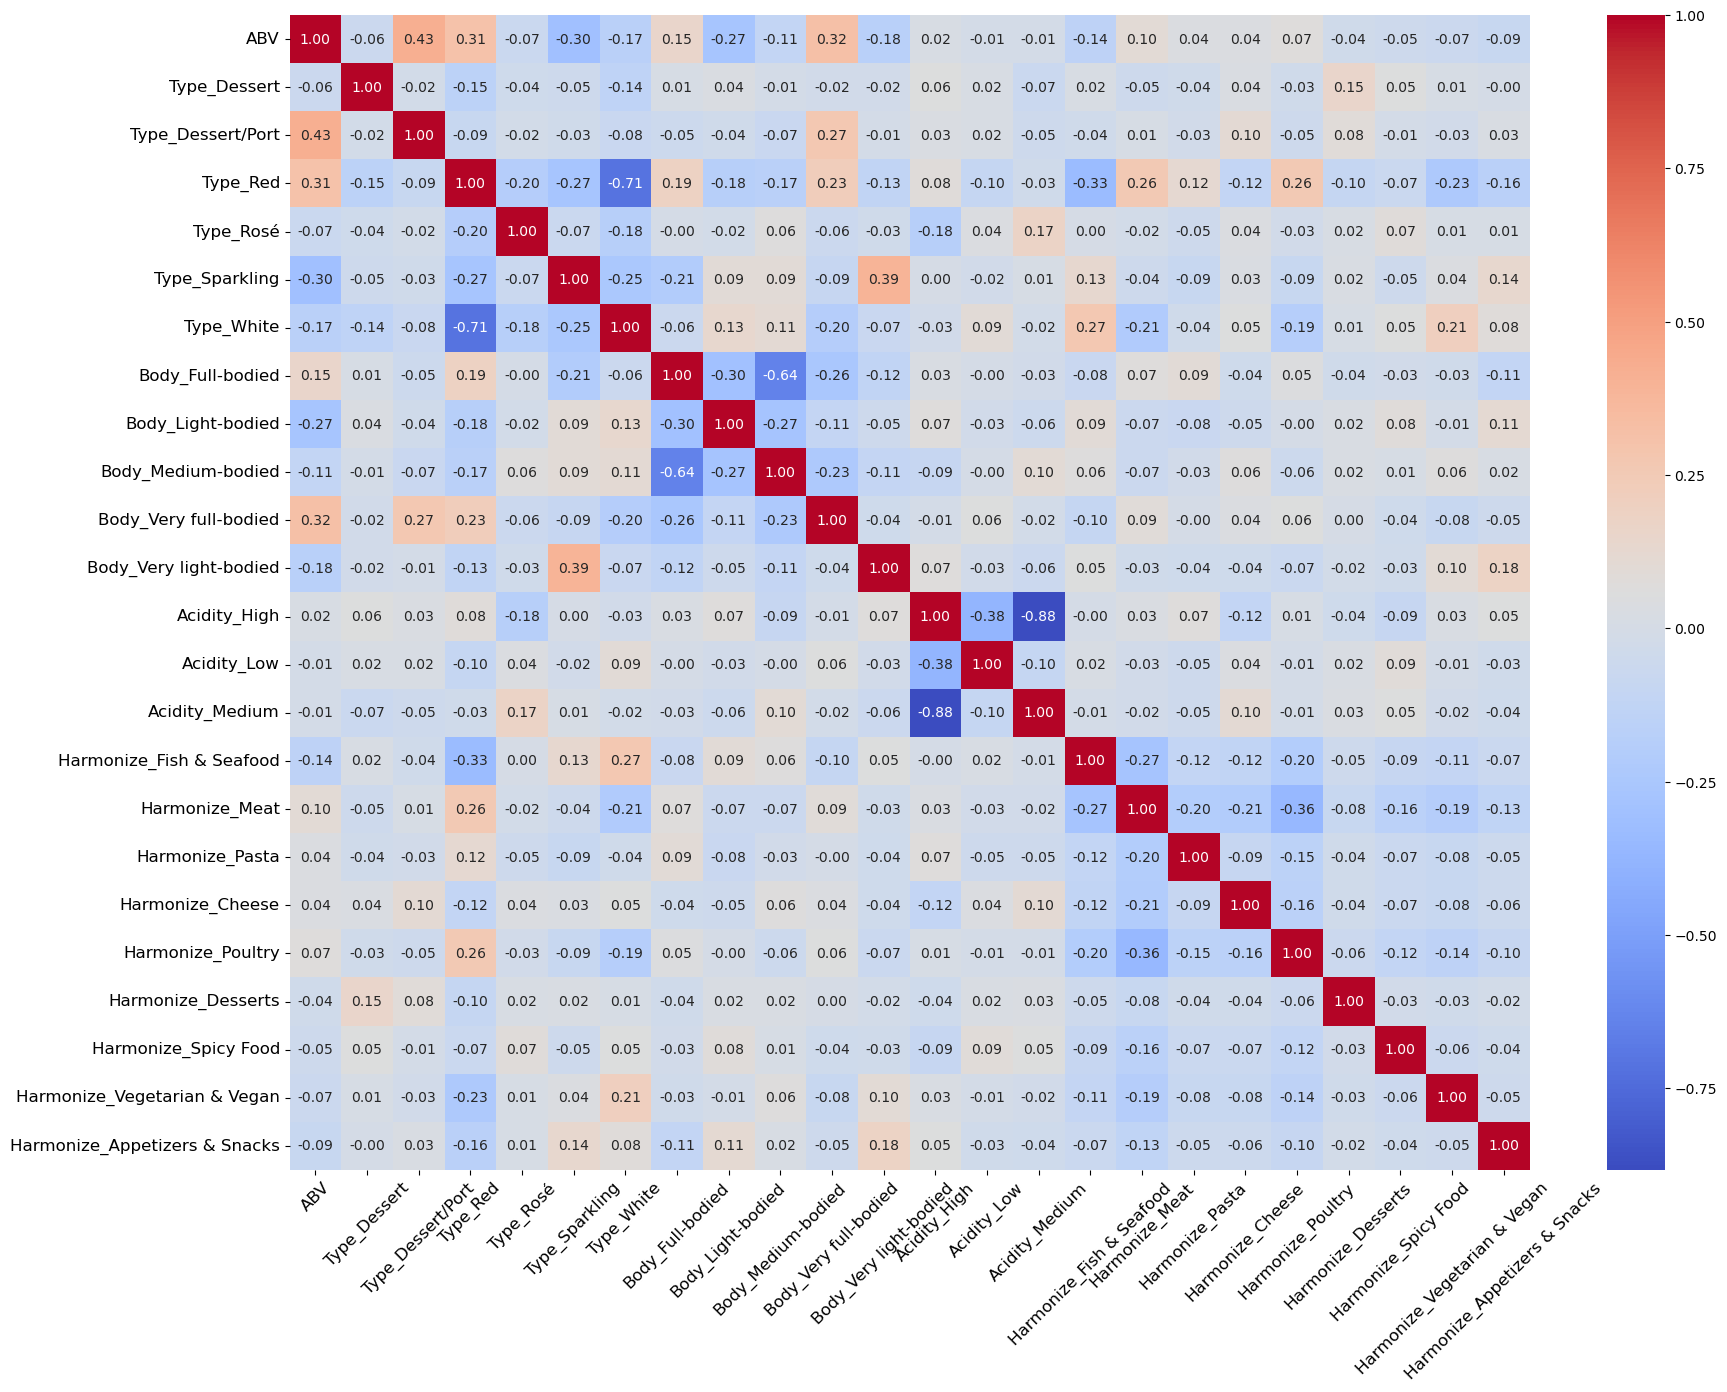

In [ ]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
elaborate_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
matrix_df = encoded_df.drop(columns=elaborate_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

### PCA

Generating PCA plot for label column: Harmonize_Fish & Seafood


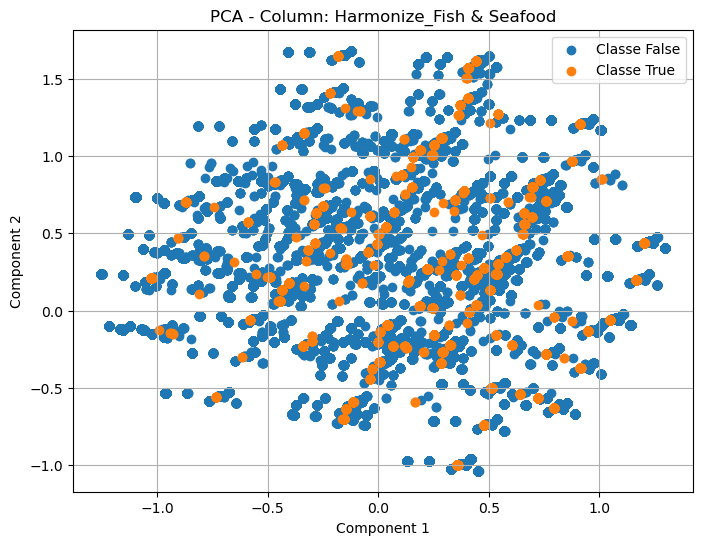

Generating PCA plot for label column: Harmonize_Meat


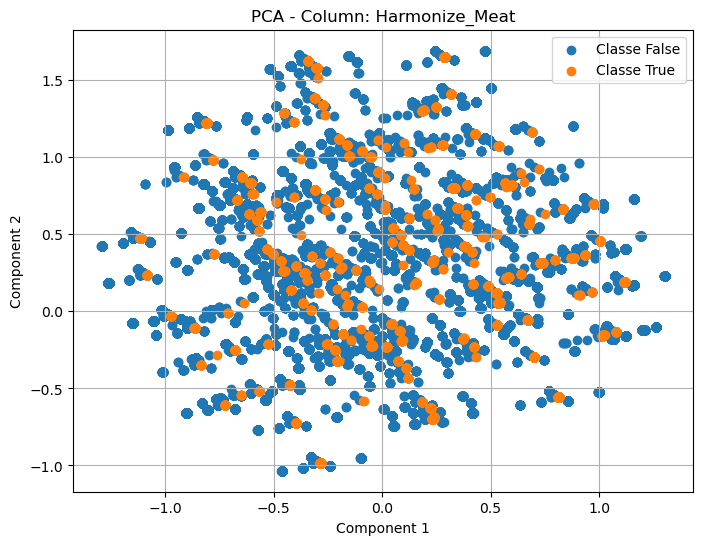

Generating PCA plot for label column: Harmonize_Pasta


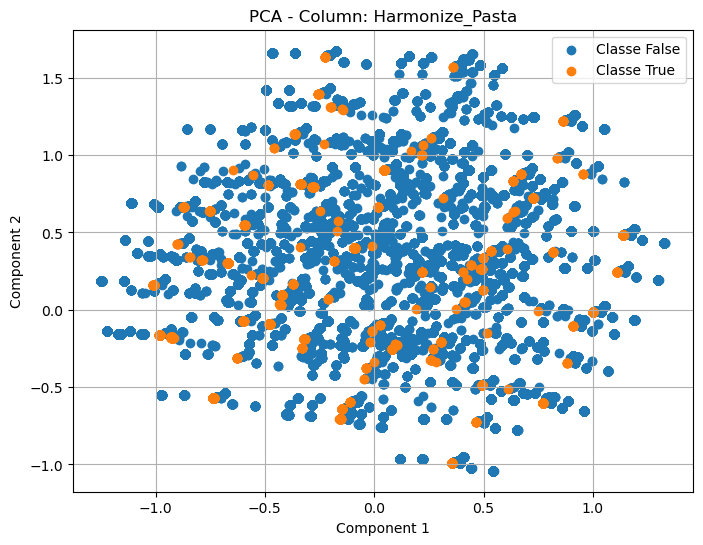

Generating PCA plot for label column: Harmonize_Cheese


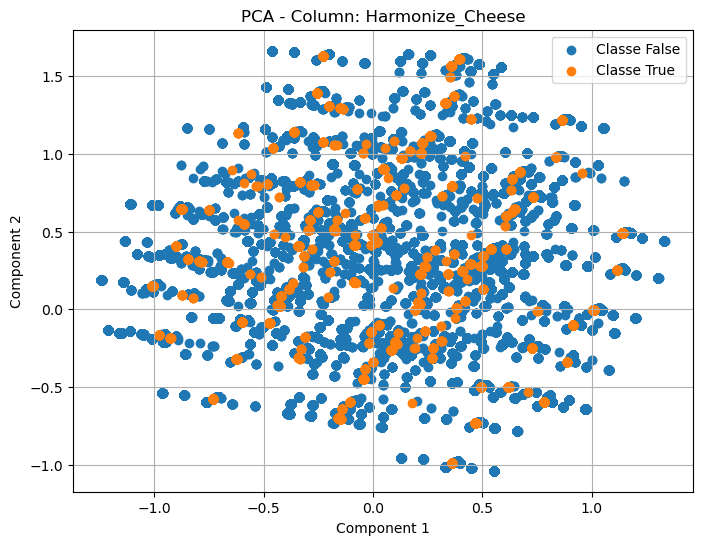

Generating PCA plot for label column: Harmonize_Poultry


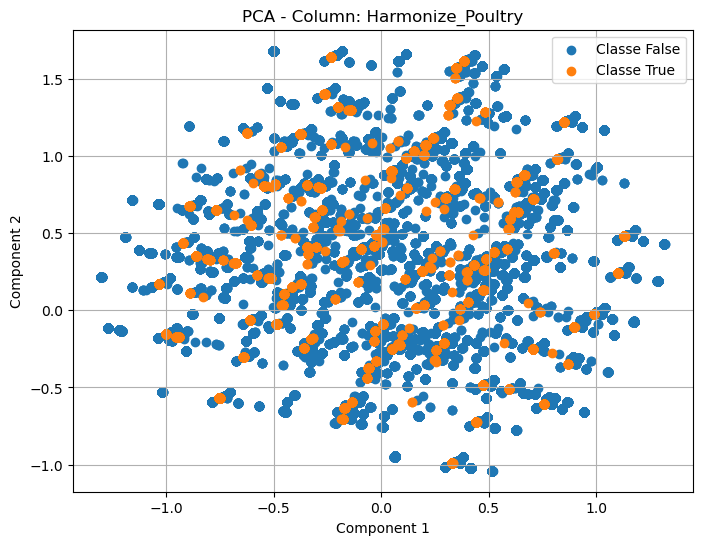

Generating PCA plot for label column: Harmonize_Desserts


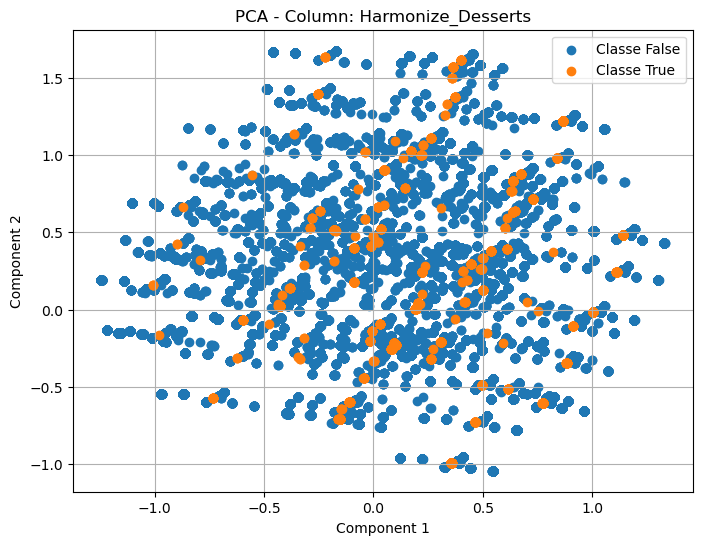

Generating PCA plot for label column: Harmonize_Spicy Food


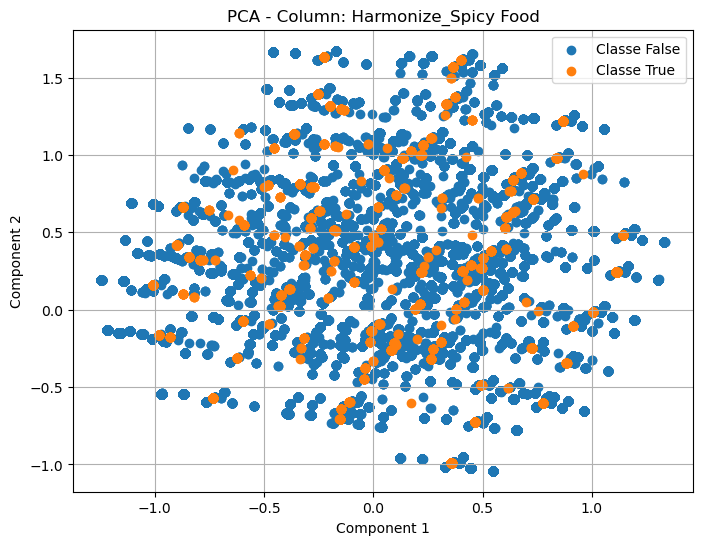

Generating PCA plot for label column: Harmonize_Vegetarian & Vegan


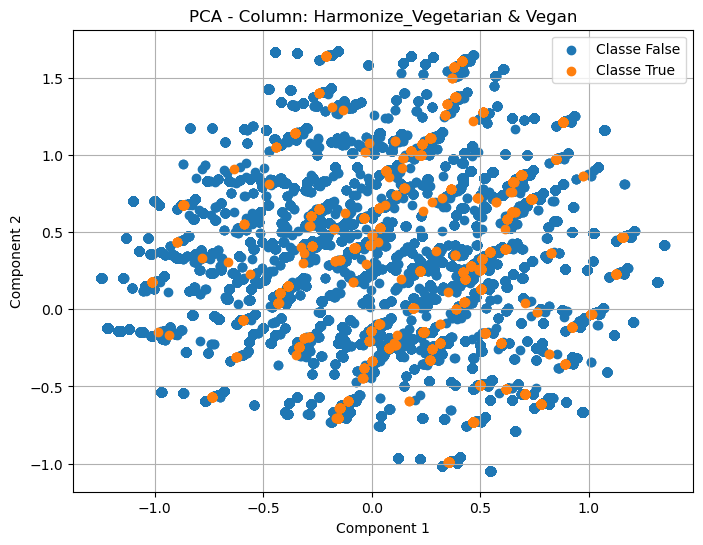

Generating PCA plot for label column: Harmonize_Appetizers & Snacks


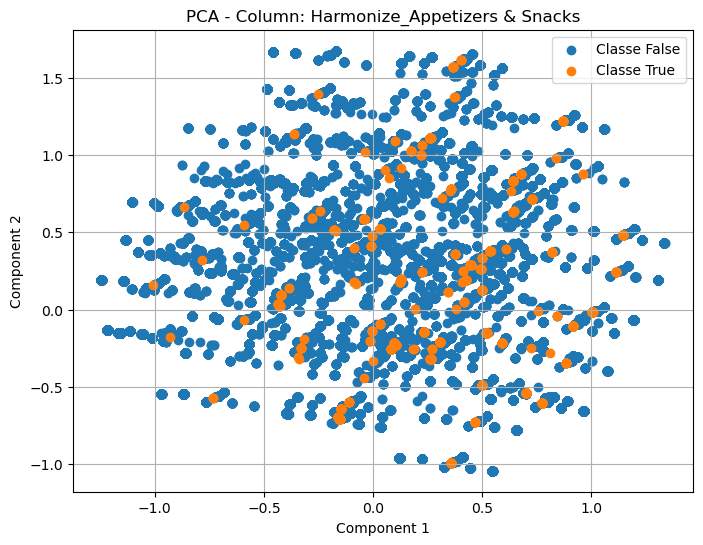

In [194]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0], 
            df_pca[labels == label, 1], 
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()